# Forecasting

In [1]:
from sktime.datasets import load_airline
import matplotlib.pyplot as plt
import numpy as np
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()

## Load data

In [2]:
y = load_airline()

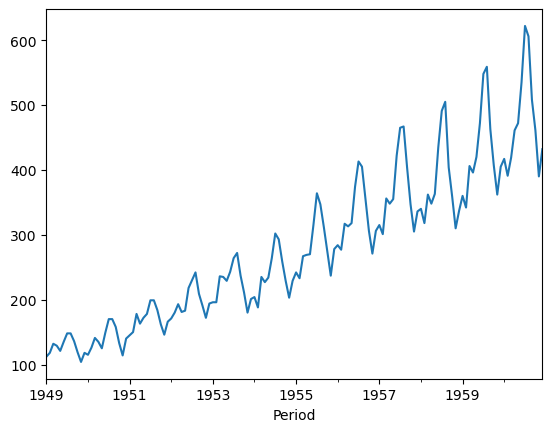

In [3]:
y.plot()
plt.show()

## Split data

In [4]:
from sktime.split import temporal_train_test_split

In [5]:
y_train, y_test = temporal_train_test_split(y)

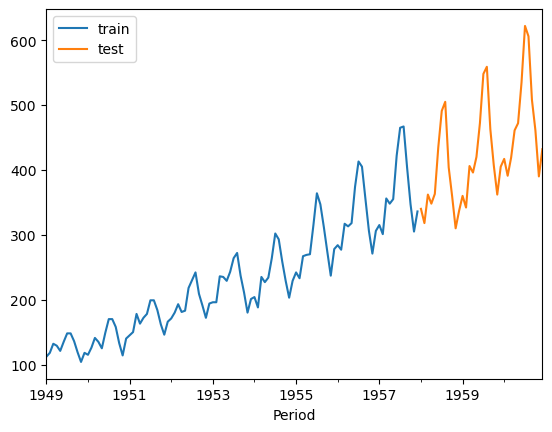

In [6]:
y_train.plot(label='train')
y_test.plot(label='test')
plt.legend()
plt.show()

In [7]:
fh = np.arange(1, len(y_test) + 1)

## Naive forecasting

In [8]:
from sktime.forecasting.naive import NaiveForecaster

### Mean

In [9]:
forecaster = NaiveForecaster(strategy="mean")

In [10]:
forecaster.fit(y_train)

NaiveForecaster(strategy='mean')

In [11]:
y_pred = forecaster.predict(fh)

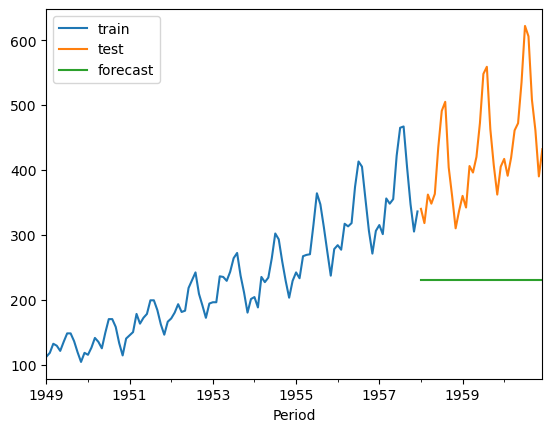

In [12]:
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [13]:
mse(y_pred, y_test)

45164.797410836756

### Last 

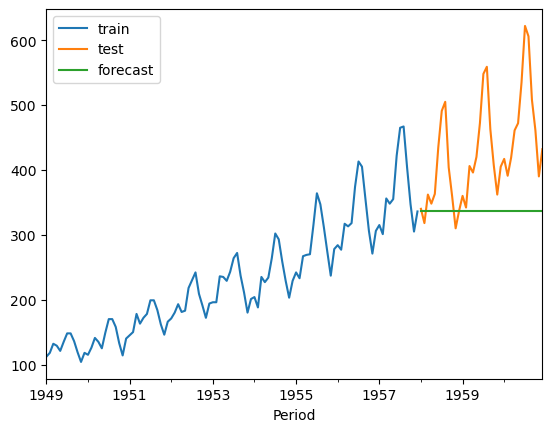

In [14]:
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [15]:
mse(y_pred, y_test)

14674.555555555555

### Drift

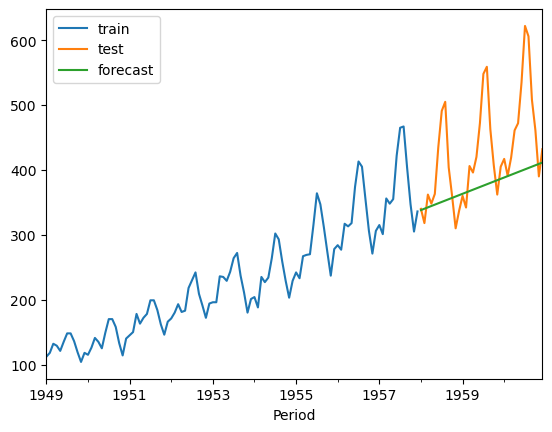

In [16]:
forecaster = NaiveForecaster(strategy="drift")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [17]:
mse(y_pred, y_test)

7695.698285148631

### Time series cross-validation

In [18]:
from sktime.performance_metrics.forecasting import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError
from sktime.forecasting.model_evaluation import evaluate
from sktime.split import ExpandingWindowSplitter

In [19]:
cv = ExpandingWindowSplitter(fh, initial_window=12, step_length=12)

In [20]:
# how many splits?
splitted = list(cv.split(y_train))
len(splitted)

6

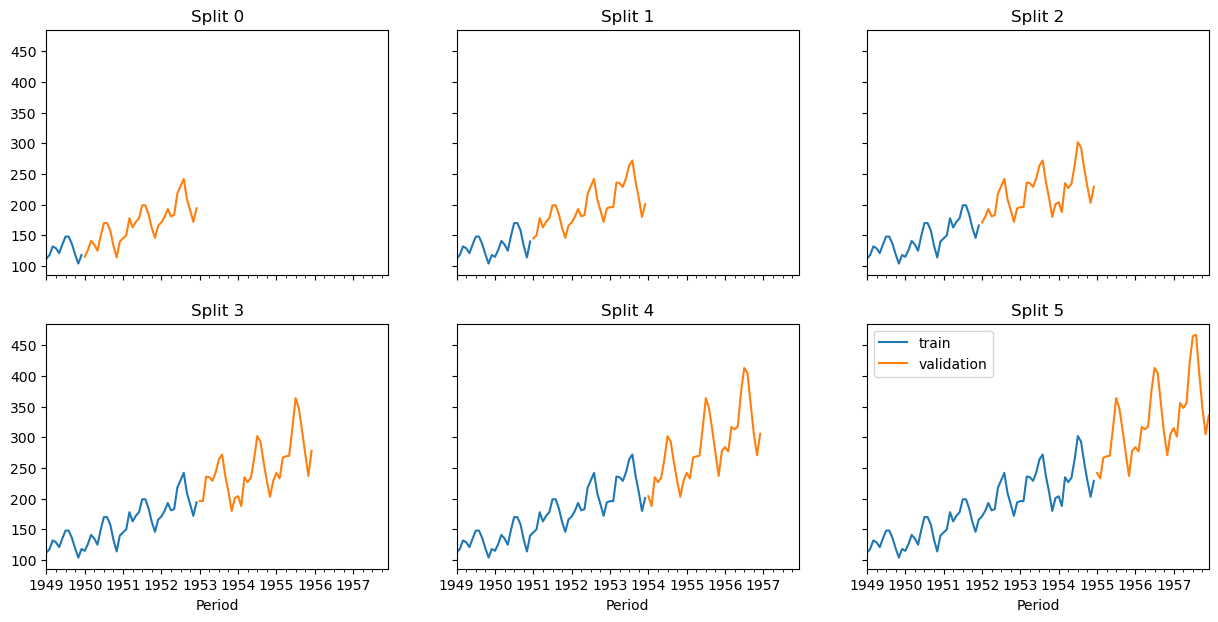

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(15, 7), sharex=True, sharey=True)
for i, (train, test) in enumerate(splitted):
    axs[i // 3, i % 3].set_title(f"Split {i}")
    y_train.iloc[train].plot(ax=axs[i // 3, i % 3], label='train')
    y_train.iloc[test].plot(ax=axs[i // 3, i % 3], label='validation')
plt.legend()
plt.show()

In [22]:
# metrics
mse = MeanSquaredError()
mae = MeanAbsoluteError()
mape = MeanAbsolutePercentageError(symmetric=True)

In [23]:
scores_df = evaluate(NaiveForecaster(strategy="mean"), cv=cv, y=y_train, scoring=[mse, mae, mape])
scores_df

,test_MeanSquaredError,test_MeanAbsoluteError,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,2712.185185,43.759259,0.280092,0.001464,0.001057,12,1949-12
1,5138.342593,64.222222,0.373987,0.001295,0.001011,24,1950-12
2,6681.194444,74.805556,0.396476,0.001321,0.000998,36,1951-12
3,10065.411458,90.930556,0.430038,0.001242,0.000899,48,1952-12
4,15494.345556,112.022222,0.471093,0.001237,0.000943,60,1953-12
5,24187.210069,143.986111,0.546547,0.001223,0.000950,72,1954-12


## Exponential smoothing

### SES

In [24]:
from sktime.forecasting.theta import ThetaForecaster

In [25]:
forecaster = ThetaForecaster(sp=12)

In [26]:
forecaster.fit(y_train)

ThetaForecaster(sp=12)

In [27]:
y_pred = forecaster.predict(fh)

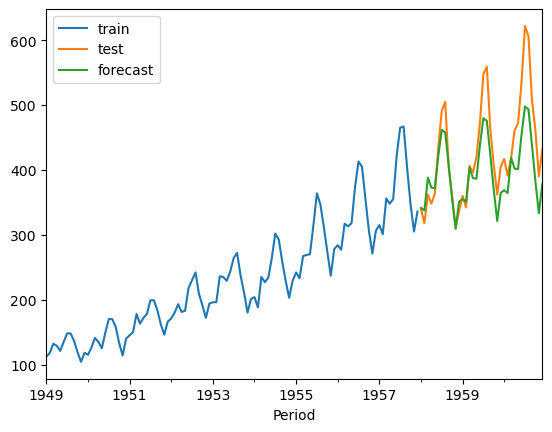

In [28]:
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [29]:
mse(y_pred, y_test)

2470.2427803531837

### Holt-Winters

In [30]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [31]:
forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)

In [32]:
forecaster.fit(y_train)

ExponentialSmoothing(seasonal='multiplicative', sp=12, trend='add')

In [33]:
y_pred = forecaster.predict(fh)

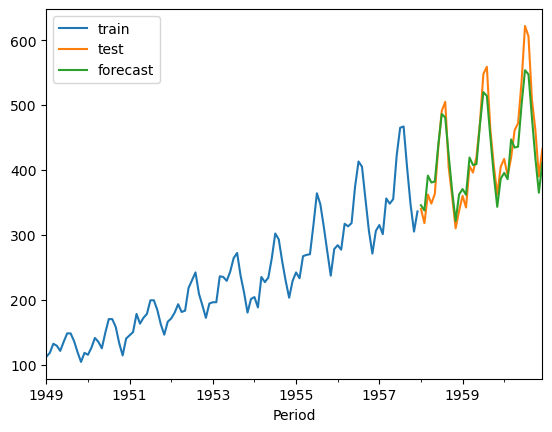

In [34]:
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [35]:
mse(y_pred, y_test)

711.5349712418024

## ARIMA

In [36]:
from sktime.forecasting.arima import ARIMA

### White noise

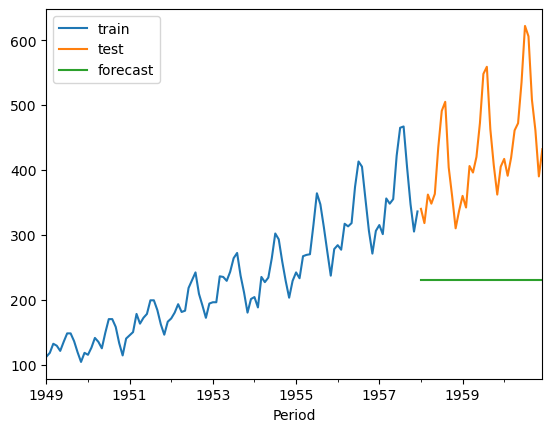

In [37]:
forecaster = ARIMA(order=(0, 0, 0))
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

### Random walk

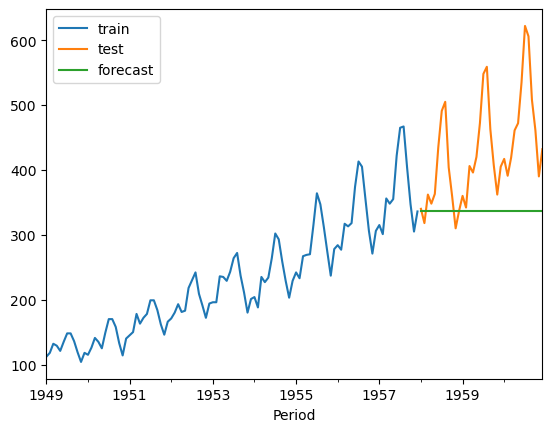

In [38]:
forecaster = ARIMA(order=(0, 1, 0), with_intercept=False)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

### Random walk with drift

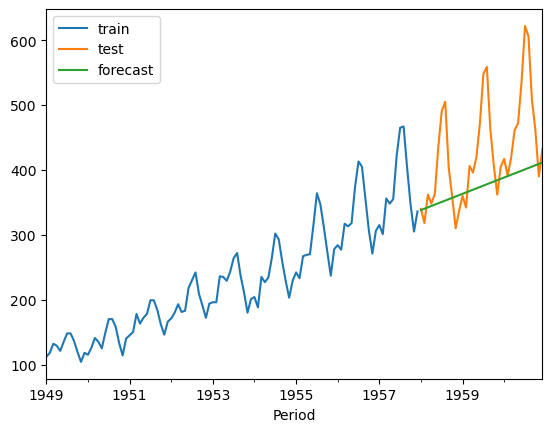

In [39]:
forecaster = ARIMA(order=(0, 1, 0), with_intercept=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

### Autoregression

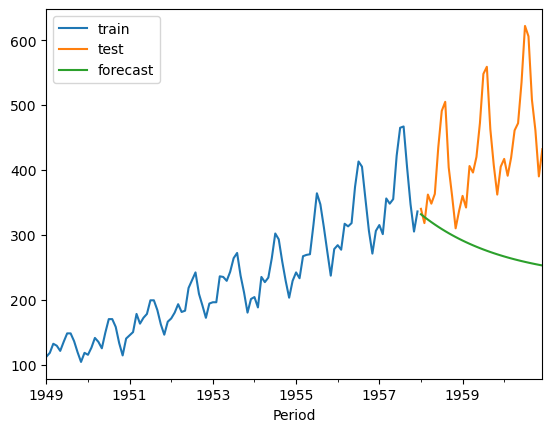

In [40]:
forecaster = ARIMA(order=(1, 0, 0))
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

### Moving average

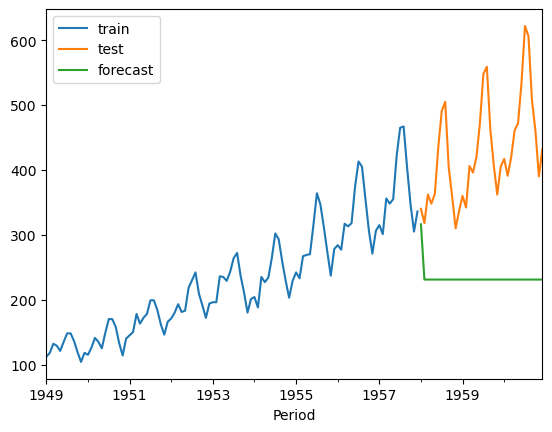

In [41]:
forecaster = ARIMA(order=(0, 0, 1))
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

### ARMA

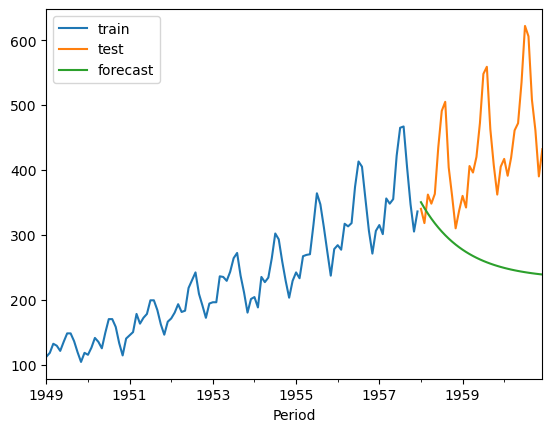

In [42]:
forecaster = ARIMA(order=(1, 0, 1))
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

### ARIMA

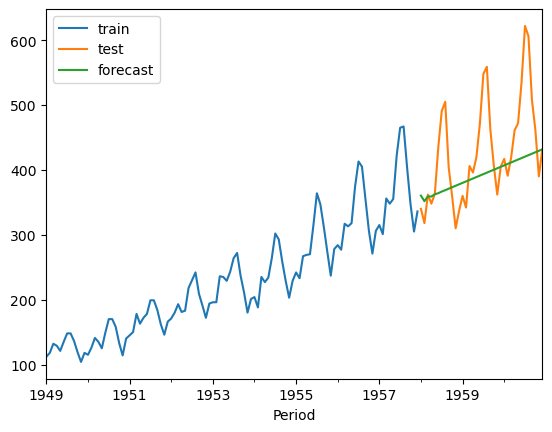

In [43]:
forecaster = ARIMA(order=(1, 1, 1))
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

### SARIMA

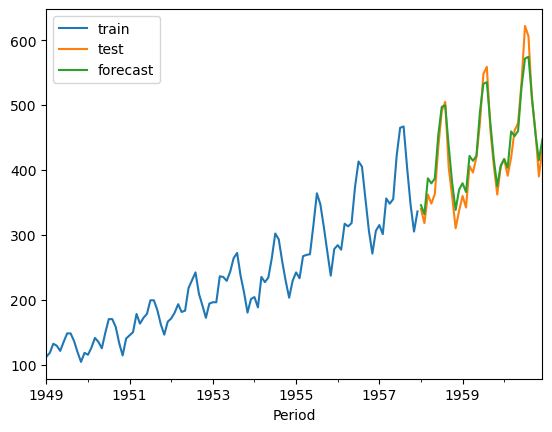

In [44]:
forecaster = ARIMA(  
    order=(1, 1, 1),
    seasonal_order=(0, 1, 0, 12))
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [45]:
mse(y_pred, y_test)

434.0854489936248

### AutoARIMA

In [46]:
from sktime.forecasting.arima import AutoARIMA

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

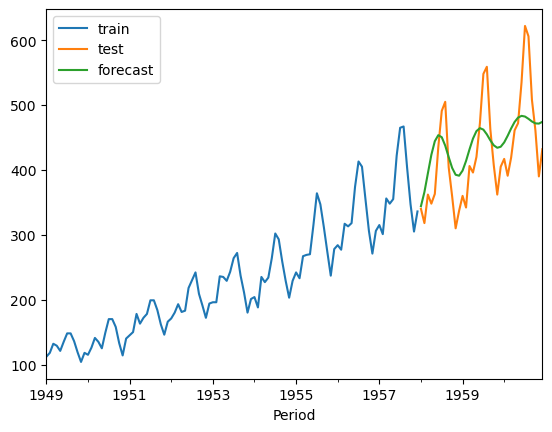

In [47]:
forecaster = AutoARIMA()
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [48]:
forecaster.get_fitted_params()

{'intercept': 0.6708152323703931,
 'ar.L1': 1.6405377113621231,
 'ar.L2': -0.9086371656749326,
 'ma.L1': -1.8337769969868813,
 'ma.L2': 0.9289388175973289,
 'sigma2': 393.31814242074717,
 'order': (2, 1, 2),
 'seasonal_order': (0, 0, 0, 0),
 'aic': 959.2179634717929,
 'aicc': 960.057963471793,
 'bic': 975.2549364785643,
 'hqic': 965.7191390849304}

In [49]:
mse(y_pred, y_test)

3505.3658590759765

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parame

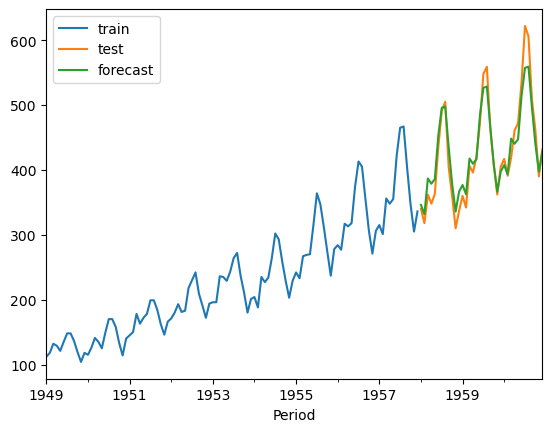

In [50]:
forecaster = AutoARIMA(sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [51]:
mse(y_pred, y_test)

489.8359031230193

In [52]:
forecaster.get_fitted_params()

{'ar.L1': -0.24111777454982325,
 'sigma2': 92.74985716210796,
 'order': (1, 1, 0),
 'seasonal_order': (0, 1, 0, 12),
 'aic': 704.0011679026005,
 'aicc': 704.1316026852093,
 'bic': 709.1089216858016,
 'hqic': 706.065083639602}

### Prophet

In [53]:
from sktime.forecasting.fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.
13:58:38 - cmdstanpy - INFO - Chain [1] start processing
13:58:38 - cmdstanpy - INFO - Chain [1] done processing


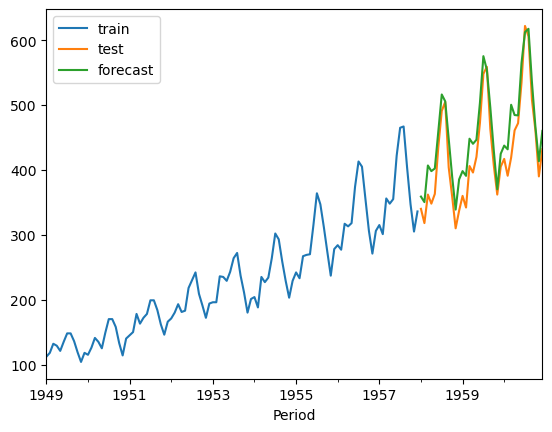

In [54]:
forecaster = Prophet(  
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y_train) / 12),
    yearly_seasonality=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()

In [55]:
mse(y_pred, y_test)

1096.8886067332323

## Forecasting via Reduction

In [56]:
from sktime.forecasting.compose import make_reduction

### Decision tree

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sktime.transformations.series.difference import Differencer

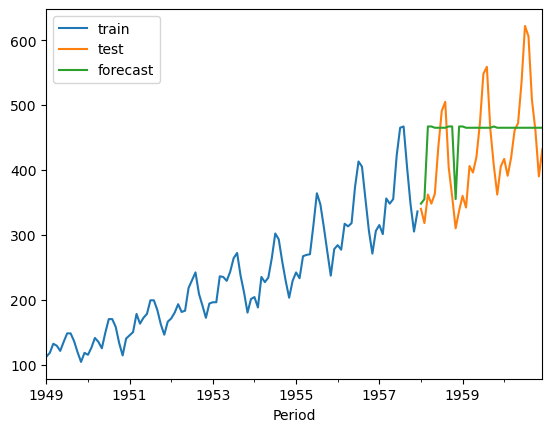

In [58]:
pipe = make_reduction(
    DecisionTreeRegressor(random_state=1),
    window_length=24
)
pipe.fit(y_train)
y_pred = pipe.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [59]:
pipe = Differencer() * make_reduction(
    DecisionTreeRegressor(random_state=1),
    window_length=24
)

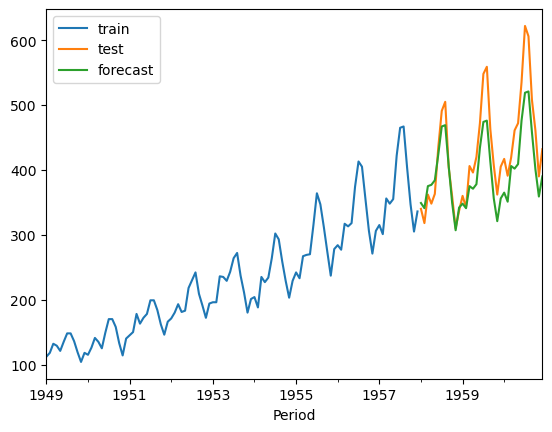

In [60]:
pipe.fit(y_train)
y_pred = pipe.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [61]:
mse(y_pred, y_test)

2020.611111111111

#### Fine-tuning

In [62]:
from sktime.transformations.series.difference import Differencer
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.compose import OptionalPassthrough
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.transformations.series.boxcox import LogTransformer

In [63]:
pipe = TransformedTargetForecaster(steps=[
    ("log", OptionalPassthrough(LogTransformer())),
    Differencer(),
    ("dt", make_reduction(
    DecisionTreeRegressor(random_state=1),
))
]
)

param_grid = {
    "log__passthrough": [True, False],
    "dt__window_length": [6, 12, 24, 48, 96]
}
gscv = ForecastingGridSearchCV(
    pipe, cv=cv, param_grid=param_grid, scoring=mse
)

In [64]:
gscv.fit(y_train)

/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/sktime/utils/parallel.py:92: FitFailedWarning: 
                In evaluate, fitting of forecaster TransformedTargetForecaster failed,
                you can set error_score='raise' in evaluate to see
                the exception message.
                Fit failed for the 0-th data split, on training data y_train with
                cutoff NaT, and len(y_train)=12.
                The score will be set to nan.
                Failed forecaster with parameters: TransformedTargetForecaster(steps=[('log',
                                    OptionalPassthrough(passthrough=True,
                                                        transformer=LogTransformer())),
                                   Differencer(),
                                   ('dt',
                                    RecursiveTabularRegressionForecaster(estimator=DecisionTreeRegressor(random_state=1),
                                           

ForecastingGridSearchCV(cv=ExpandingWindowSplitter(fh=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36]),
                                                   initial_window=12,
                                                   step_length=12),
                        forecaster=TransformedTargetForecaster(steps=[('log',
                                                                       OptionalPassthrough(transformer=LogTransformer())),
                                                                      Differencer(),
                                                                      ('dt',
                                                                       RecursiveTabularRegressionForecaster(estimator=DecisionTreeRegressor(random_state=1)))]),
                        param_grid={'dt__window_length': [6, 12, 24, 48, 96],
                                    'log__passthrough': [True, False]},
                        scoring=MeanSquaredError())

In [65]:
y_pred = gscv.predict(fh)

In [66]:
gscv.best_params_

{'dt__window_length': 12, 'log__passthrough': True}

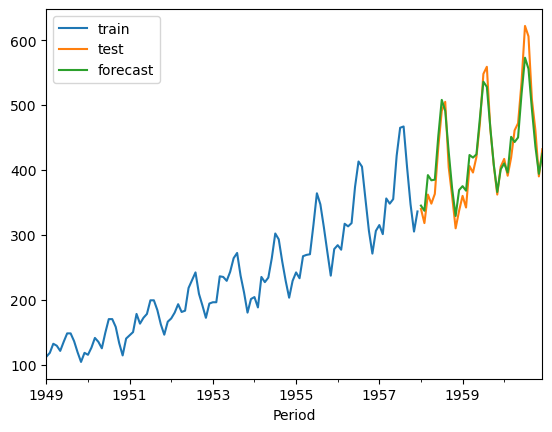

In [67]:
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [68]:
mse(y_pred, y_test)

470.3333333333333

### Rocket

In [69]:
from sktime.regression.kernel_based import RocketRegressor

In [70]:
pipe = make_reduction(
    RocketRegressor(random_state=1, rocket_transform="minirocket"),
    window_length=12
)
pipe

RecursiveTimeSeriesRegressionForecaster(estimator=RocketRegressor(random_state=1,
                                                                  rocket_transform='minirocket'),
                                        window_length=12)

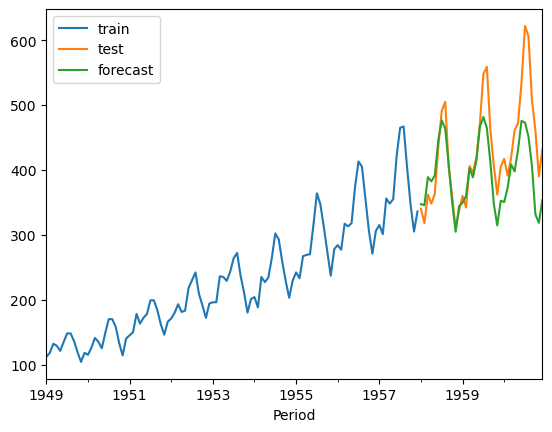

In [71]:
pipe.fit(y_train)
y_pred = pipe.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [72]:
mse(y_pred, y_test)

3586.267709130758

In [73]:
from sktime.transformations.series.difference import Differencer
from sktime.transformations.series.detrend import Detrender
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.transformations.series.boxcox import LogTransformer

In [74]:
pipe = LogTransformer() * Detrender() * Deseasonalizer() * Differencer() * make_reduction(
    RocketRegressor(random_state=1, rocket_transform="minirocket"),
    window_length=12
)

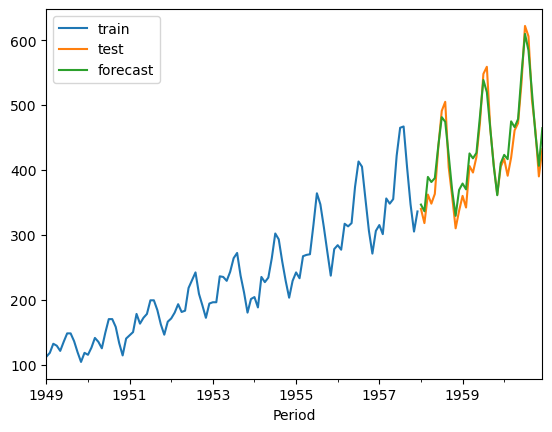

In [75]:
pipe.fit(y_train)
y_pred = pipe.predict(fh)
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

In [76]:
mse(y_pred, y_test)

435.1335377097112

## Deep learning

### TFT

In [77]:
import pandas as pd
from neuralforecast import NeuralForecast
from neuralforecast.models import TFT

In [78]:
y_train_nixla = pd.DataFrame({'ds': y_train.index, 'y': y_train.values, 'unique_id': '1'})
y_test_nixla = pd.DataFrame({'ds': y_test.index, 'y': y_test.values, 'unique_id': '1'})
y_train_nixla["ds"] = np.arange(len(y_train_nixla))
y_test_nixla["ds"] = np.arange(len(y_test_nixla)) + len(y_train_nixla)

In [79]:
nf = NeuralForecast(
    models=[TFT(h=len(fh), 
                input_size=48,
                hidden_size=20,
                learning_rate=0.005,
                max_steps=50,
                scaler_type='robust',
                enable_progress_bar=True,
                accelerator="cpu"
                ),
    ],
    freq=1
)
nf.fit(df=y_train_nixla)
y_pred = nf.predict(y_train_nixla)
y_pred = pd.Series(y_pred.TFT.values, index=y_test.index)

Seed set to 1
/opt/miniconda3/envs/2025_phd_ts_course/lib/python3.12/site-packages/neuralforecast/common/_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params | Mode 
-----------------------------------------------------------------------------
0 | loss                    | MAE                      | 0      | train
1 | padder_train            | ConstantPad1d            | 0      | train
2 | scaler                  | TemporalNorm             | 0      | train
3 | embedding               | TFTEmbedding             | 80     | train
4 | temporal_encoder        | TemporalCovariateEncoder | 15.9 K | train
5 | temporal_fusion_decoder | TemporalFusionDecoder    | 6.6 K  | train
6 | output_adapter          | Linear                   | 21     |

Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=50` reached.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                             | 0/? [00:00<?, ?it/s]

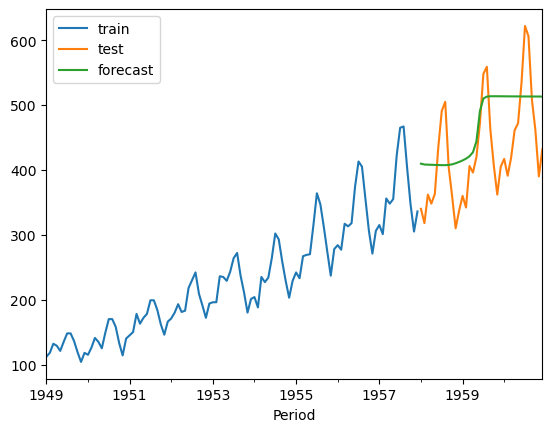

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

# Probabilistic forecasting

In [81]:
from sktime.performance_metrics.forecasting.probabilistic import PinballLoss

metrics: interval vs quantile metrics
Interval and quantile metrics can be used interchangeably:

internally, these are easily convertible to each other
$\text{lower/upper interval} = \text{quantiles at } 0.5\pm 0.5 \times \text{coverage}$

E.g.
For a 95% confidence interval:
- Coverage is 0.95.
- The lower bound is the quantile at \(0.5 - 0.5 \times 0.95 = 0.025\).
- The upper bound is the quantile at \(0.5 + 0.5 \times 0.95 = 0.975\).

So, a 95% confidence interval corresponds to the 2.5th and 97.5th percentiles.


In [82]:
# from sktime.registry import all_estimators
# 
# all_estimators(
#     "forecaster", filter_tags={"capability:pred_int": True}, as_dataframe=True
# )

## ARIMA

In [83]:
from sktime.forecasting.arima import ARIMA

In [84]:
forecaster = ARIMA(order=(1, 1, 1), seasonal_order=(0, 1, 0, 12))
forecaster.fit(y_train)

ARIMA(order=(1, 1, 1), seasonal_order=(0, 1, 0, 12))

### Point forecasts

In [85]:
y_pred = forecaster.predict(fh)

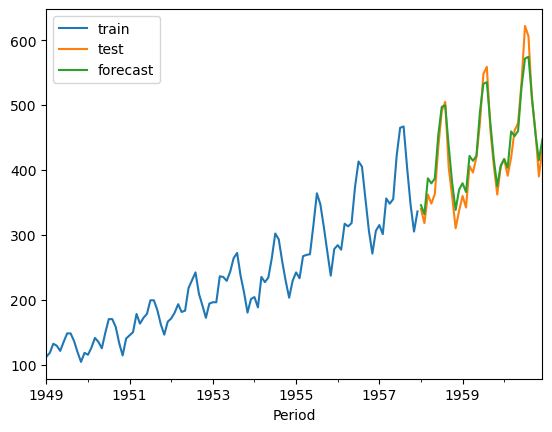

In [86]:
y_train.plot(label='train')
y_test.plot(label='test')
y_pred.plot(label='forecast')
plt.legend()
plt.show()

### Prediction intervals

In [87]:
coverage = 0.9
y_pred_ints = forecaster.predict_interval(fh=fh, coverage=coverage)
y_pred_ints

Number of airline passengers            
                                 0.9            
                               lower       upper
1958-01                   329.877206  361.384878
1958-02                   311.646623  351.751174
1958-03                   362.398927  411.818523
1958-04                   351.294236  407.327575
1958-05                   355.339836  417.938504
1958-06                   419.804672  487.977078
1958-07                   460.424587  533.953547
1958-08                   460.257117  538.660947
1958-09                   395.216191  478.276084
1958-10                   336.307960  423.737710
1958-11                   292.498964  384.112739
1958-12                   321.784114  417.385949
1959-01                   323.363383  435.631783
1959-02                   303.951363  427.739707
1959-03                   353.557254  489.515376
1959-04                   340.920527  487.117329
1959-05                   343.483529  499.772354
1959-06                   406.427363  571.893044
1959-07                   445.572409  619.905729
1959-08                   443.954403  626.624871
1959-09                   377.506425  568.208350
1959-10                   317.227534  515.601875
1959-11                   272.087918  477.868796
1959-12                   300.079064  512.997261
1960-01                   301.878316  531.584376
1960-02                   281.824534  524.895317
1960-03                   330.814299  587.848373
1960-04                   317.333561  586.855595
1960-05                   319.037677  600.930765
1960-06                   381.052945  674.541280
1960-07                   419.260814  724.052402
1960-08                   416.686345  732.289264
1960-09                   349.282517  675.389853
1960-10                   288.047368  624.300895
1960-11                   241.958287  588.078540
1960-12                   269.007421  624.710275

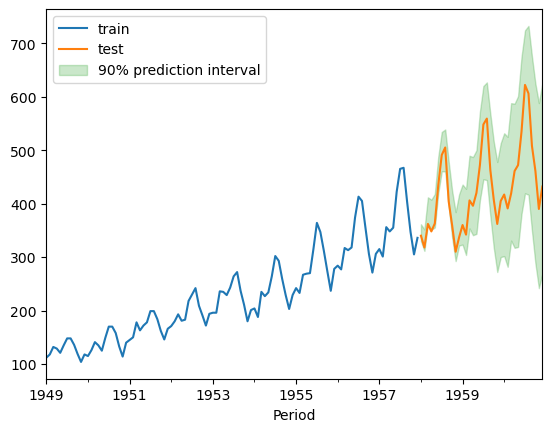

In [88]:
y_train.plot(label='train')
y_test.plot(label='test')
# y_pred.plot(label='forecast')
plt.fill_between(y_pred_ints.index, y_pred_ints.iloc[:, 0], y_pred_ints.iloc[:, 1], alpha=0.25, color='C2', label=f'{coverage:.0%} prediction interval')
plt.legend()
plt.show()

In [89]:
loss = PinballLoss()
loss(y_true=y_test, y_pred=y_pred_ints)

4.482899785123706

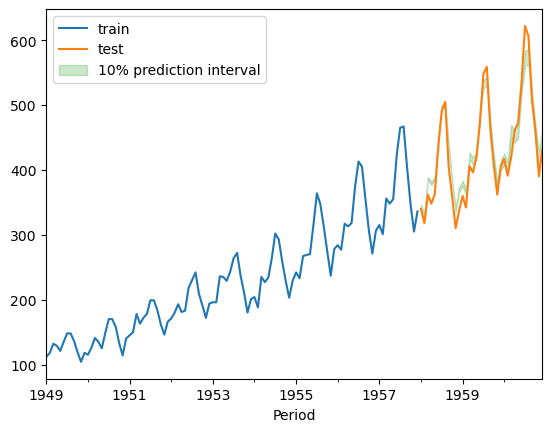

In [90]:
coverage = 0.1
y_pred_ints = forecaster.predict_interval(fh=fh, coverage=coverage)
y_train.plot(label='train')
y_test.plot(label='test')
plt.fill_between(y_pred_ints.index, y_pred_ints.iloc[:, 0], y_pred_ints.iloc[:, 1], alpha=0.25, color='C2', label=f'{coverage:.0%} prediction interval')
plt.legend()
plt.show()


### Quantile forecasts

In [91]:
y_pred_quantiles = forecaster.predict_quantiles(fh=fh, alpha=[0.1, 0.9])
y_pred_quantiles

Number of airline passengers            
                                 0.1         0.9
1958-01                   333.356786  357.905297
1958-02                   316.075609  347.322189
1958-03                   367.856628  406.360821
1958-04                   357.482333  401.139478
1958-05                   362.252981  411.025358
1958-06                   427.333359  480.448391
1958-07                   468.544830  525.833304
1958-08                   468.915722  530.002343
1958-09                   404.388992  469.103282
1958-10                   345.963350  414.082319
1958-11                   302.616422  373.995282
1958-12                   332.341997  406.828066
1959-01                   335.761855  423.233312
1959-02                   317.622051  414.069019
1959-03                   368.571924  474.500707
1959-04                   357.065915  470.971941
1959-05                   360.743439  482.512443
1959-06                   424.700729  553.619678
1959-07                   464.825081  600.653057
1959-08                   464.127796  606.451478
1959-09                   398.566780  547.147995
1959-10                   339.135200  493.694209
1959-11                   294.813532  455.143182
1959-12                   323.592895  489.483430
1960-01                   327.246131  506.216561
1960-02                   308.668296  498.051556
1960-03                   359.200110  559.462562
1960-04                   347.098492  557.090664
1960-05                   350.168818  569.799624
1960-06                   413.464618  642.129607
1960-07                   452.920773  690.392443
1960-08                   451.540265  697.435345
1960-09                   385.296502  639.375868
1960-10                   325.181857  587.166406
1960-11                   280.182418  549.854409
1960-12                   308.289816  585.427880

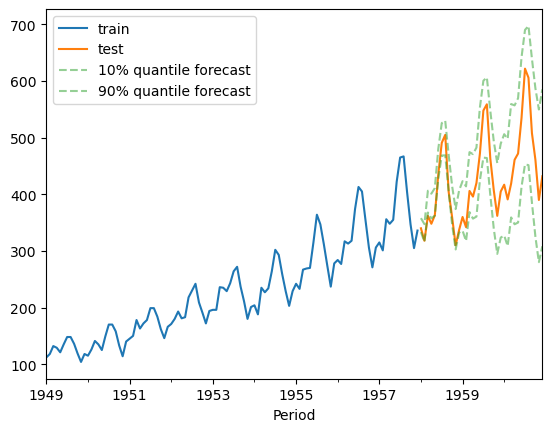

In [92]:
y_train.plot(label='train')
y_test.plot(label='test')

for column in y_pred_quantiles.columns:
    alpha = column[1]
    y_pred_quantiles[column].plot(label=f'{alpha:.0%} quantile forecast', c='C2', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [93]:
loss = PinballLoss(score_average=False)
loss(y_true=y_test, y_pred=y_pred_quantiles)

0.1    6.492681
0.9    7.755360
Name: 0, dtype: float64